In [1]:
import sys; sys.path.insert(0, '../')
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
obesity = pd.read_csv("../data/obesity/obesity_by_state.tsv", sep='\t')
usa = gpd.read_file("../data/united_states/usa.geojson")
continental_usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]

In [78]:
continental_usa['State'] = [
    'Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington', 'Arizona',
    'California', 'Colorado', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Wyoming',
    'Arkansas', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
    'Louisiana', 'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire', 
    'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia', 'Mississippi',
    'South Carolina', 'Illinois', 'Indiana', 'Kentucky', 'North Carolina', 'Ohio',
    'Tennessee', 'Virginia', 'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
    'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan'
]

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
obesity.query("State == 'Alabama'")

,State,Percent
0,Alabama,32.4


In [100]:
continental_usa['Obesity Rate'] = continental_usa['State'].map(
    lambda state: obesity.query("State == @state").iloc[0]['Percent']
)

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


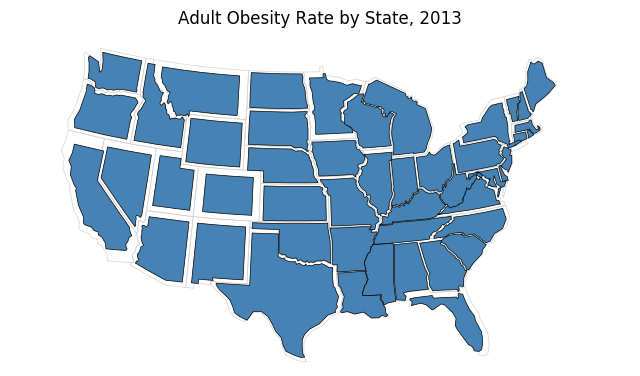

In [110]:
ax = gplt.cartogram(continental_usa, scale='Obesity Rate', 
                    projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
                    limits=(0.75, 1),
                    linewidth=0.5, facecolor='steelblue', trace_kwargs={'linewidth': 0.5})
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))
plt.title("Adult Obesity Rate by State, 2013")